# Importing the libraries required for analysis


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Handling

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

we have 891 passenger id to analyze here

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


some data have missing values Take care of missing values: The features ticket and cabin have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.drop(['Ticket','Cabin'], axis=1)

# Remove NaN values
df = df.dropna() 

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

from the observation we can cleary say no column have NaN values now

we need to convert column "Sex" to binary values so we use 'LabelEncoder' here to convert column to binary value

In [11]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int32

Here,1 represent male and 0 represent female

In [13]:
le=LabelEncoder()
df["Embarked"]=le.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: Embarked, Length: 712, dtype: int32

here, 0 represent 'C',1 represent 'Q',2 represent 'S'

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,29.1250,1
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


In [15]:
print(df["Sex"].value_counts())
print(df["Embarked"].value_counts())

1    453
0    259
Name: Sex, dtype: int64
2    554
0    130
1     28
Name: Embarked, dtype: int64


# Ploting And Visualizing

In this graph we can know the count of the sex,where male is represented by 1 and female represented by 0

<AxesSubplot:xlabel='Sex', ylabel='count'>

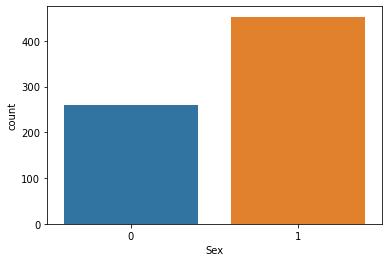

In [16]:
sns.countplot(df["Sex"])

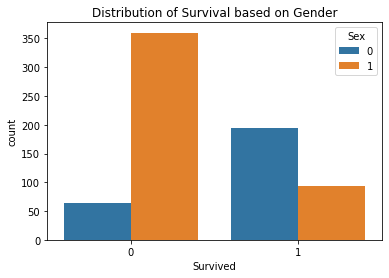

total_survived: 288
total_survived_females : 195
total_survived_males: 93


In [17]:
sns.countplot(df['Survived'],hue=df['Sex'])
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = df[df.Sex == 0]["Survived"].sum()
total_survived_males = df[df.Sex == 1]["Survived"].sum()
total_survived=df["Survived"].sum()
print("total_survived:",total_survived)
print("total_survived_females :",total_survived_females )
print("total_survived_males:",total_survived_males)

In above plot orange colour represent - 'male'passengers 
blue colour represent 'female' passengers 
0 represent death of passenger
1 represent survived passenger

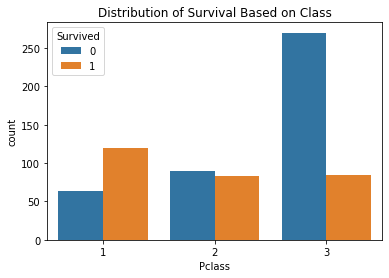

total_survived: 288
total_survived_classone: 120
total_survived_classtwo : 83
total_survived_classthree: 85


In [18]:
sns.countplot(df['Pclass'],hue=df["Survived"])
plt.title("Distribution of Survival Based on Class")
plt.show()
total_survived_classone = df[df.Pclass == 1]["Survived"].sum()
total_survived_classtwo = df[df.Pclass == 2]["Survived"].sum()
total_survived_classthree = df[df.Pclass == 3]["Survived"].sum()

total_survived=df["Survived"].sum()
print("total_survived:",total_survived)
print("total_survived_classone:",total_survived_classone)
print("total_survived_classtwo :",total_survived_classtwo )
print("total_survived_classthree:",total_survived_classthree)

In the above plot blue represent death and orange represent survival,1,2,3 represent class of passengers

Text(0, 0.5, 'Proportion')

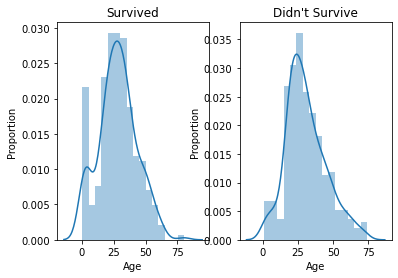

In [19]:
plt.subplot(1, 2, 1)
sns.distplot(df[df.Survived == 1]["Age"])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(df[df.Survived == 0]["Age"])
plt.title("Didn't Survive")
plt.ylabel("Proportion")

# Checking Correlation

In [20]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Survived,0.029526,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.035609,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,0.024674,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,0.033681,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


<AxesSubplot:>

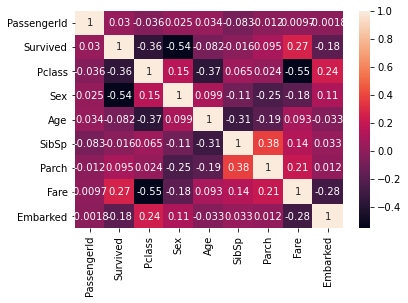

In [21]:
sns.heatmap(df.corr(),annot=True)

Here PassengerId is least correlated,hence drop PassengerId column

In [22]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# removing of outliers

Survived        AxesSubplot(0.125,0.71587;0.352273x0.16413)
Pclass       AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Sex            AxesSubplot(0.125,0.518913;0.352273x0.16413)
Age         AxesSubplot(0.547727,0.518913;0.352273x0.16413)
SibSp          AxesSubplot(0.125,0.321957;0.352273x0.16413)
Parch       AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Fare              AxesSubplot(0.125,0.125;0.352273x0.16413)
Embarked       AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

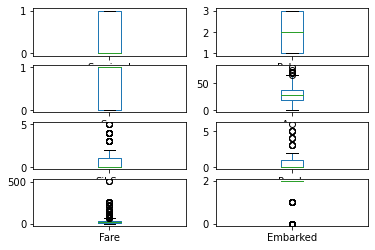

In [23]:
df.plot(kind='box',subplots=True,layout=(4,2))

In [24]:
import scipy
import scipy as stats
from scipy.stats import zscore
from scipy.stats import percentileofscore
z=abs(zscore(df))

In [25]:
print(np.where(z>3))

(array([ 12,  15,  22,  23,  36,  44,  50,  53,  65,  66,  92,  93, 131,
       133, 136, 144, 187, 207, 209, 213, 222, 240, 247, 273, 287, 300,
       303, 308, 349, 350, 350, 382, 428, 429, 448, 481, 497, 504, 535,
       536, 539, 542, 545, 554, 568, 580, 585, 586, 588, 616, 619, 626,
       649, 659, 676, 677, 684, 707], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 6, 4, 4, 5, 4, 4, 4, 6, 4, 4, 4, 6,
       6, 6, 5, 6, 6, 4, 5, 5, 6, 4, 4, 4, 5, 5, 3, 5, 5, 6, 4, 4, 6, 6,
       6, 6, 5, 6, 6, 5, 6, 4, 4, 4, 4, 3, 5, 5], dtype=int64))


In [27]:
dff=df[(z<3).all(axis=1)]
print("original shape=",df.shape,"\nNew shape=",dff.shape)

original shape= (712, 8) 
New shape= (655, 8)


# Removing skewness

In [28]:
dff.skew()

Survived    0.383253
Pclass     -0.461180
Sex        -0.632179
Age         0.372295
SibSp       1.797274
Parch       1.888853
Fare        2.161505
Embarked   -1.519573
dtype: float64

Survived
0.3823750021731956


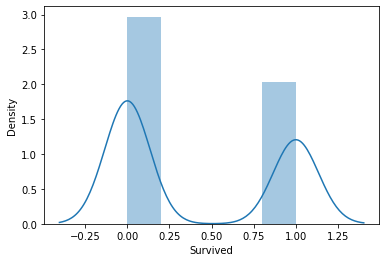

Pclass
-0.4601232950532229


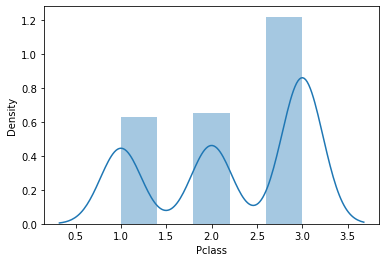

Sex
-0.6307302863979452


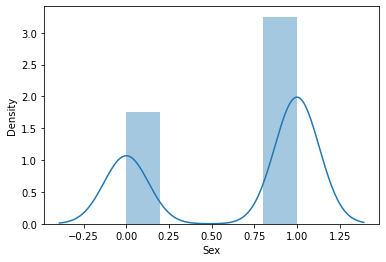

Age
0.3714421695566258


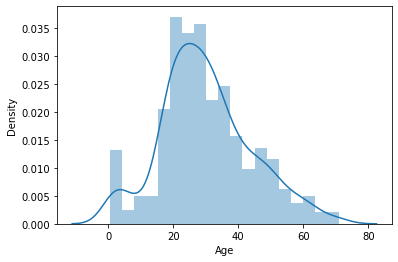

SibSp
1.7931557077179516


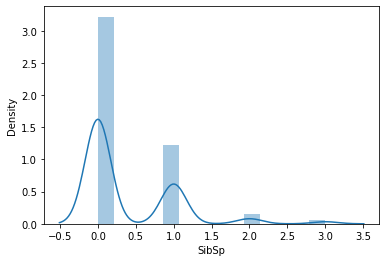

Parch
1.8845250017733546


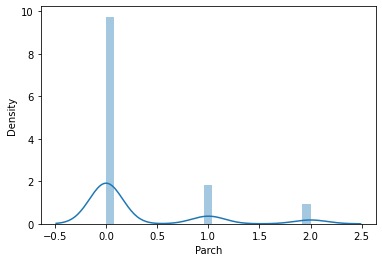

Fare
2.156551710882459


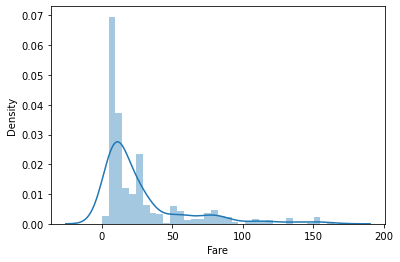

Embarked
-1.5160906827974987


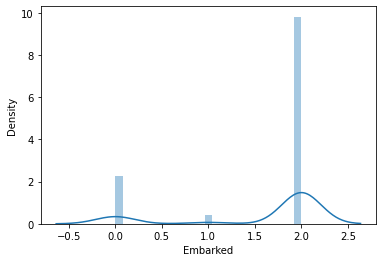

In [29]:
from scipy.stats import skew
for col in dff:
    print(col)
    print(skew(dff[col]))
    
    plt.figure()
    sns.distplot(dff[col])
    plt.show()

In [31]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare"]
X = dff[features] #defining features set
Y = dff["Survived"] #defining label set

In [32]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method=("yeo-johnson"))

# Model Fitting and Predicting

In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

We can also use a GridSearch cross validation to find the optimal parameters for the model 


In [35]:
from sklearn.model_selection import GridSearchCV

To evaluate our model performance, we can use the make_scorere and accuracy_score function from sklearn metrics.

In [36]:
from sklearn.metrics import make_scorer, accuracy_score

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.33,random_state=42)


In [38]:
X_train.shape

(438, 5)

In [39]:
X_test.shape

(217, 5)

In [40]:
Y_train.shape

(438,)

In [41]:
Y_test.shape

(217,)

# SVC Model

In [42]:
svc_clf = SVC() 
svc_clf.fit(X, Y)
pred_svc = svc_clf.predict(X_test)
acc_svc = accuracy_score(Y_test, pred_svc)

print(acc_svc)

0.847926267281106


# RandomForest Model

In [43]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X,Y)
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(Y_test, pred_rf)

print(acc_rf)

0.9861751152073732


# KNeighbors Model

In [44]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X,Y)
pred_knn = knn_clf.predict(X_test)
acc_knn = accuracy_score(Y_test, pred_knn)

print(acc_knn)

0.8755760368663594


# LogisiticRegression Model

In [45]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X, Y)
pred_logreg = logreg_clf.predict(X_test)
acc_logreg = accuracy_score(Y_test, pred_logreg)

print(acc_logreg)

0.8202764976958525


# DecisionTree Model

In [46]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, Y)
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(Y_test, pred_dt)

print(acc_dt)

0.9861751152073732


# GaussianNB Model

In [47]:
gnb_clf = GaussianNB()
gnb_clf.fit(X,Y)
pred_gnb = gnb_clf.predict(X_test)
acc_gnb = accuracy_score(Y_test, pred_gnb)

print(acc_gnb)

0.8064516129032258


# Evaluating Model Performances

In [48]:
model_performance = pd.DataFrame({
    "Model": ["SVC","Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree",],
    "Accuracy": [acc_svc,acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt,]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
1,Random Forest,0.986175
5,Decision Tree,0.986175
3,K Nearest Neighbors,0.875576
0,SVC,0.847926
2,Logistic Regression,0.820276
4,Gaussian Naive Bayes,0.806452


It appears that the Random Forest model and Decision tree works the best with our data, so we will use Random Forest model on the test set.

# Tuning Parameters with GridSearchCV

We will run a GridSearchCV to find the best parameters for the model and use that model to train and test our data.

In [49]:
rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, Y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=7)

we have the optimal parameters for our Random Forest model, we can build a new model with those parameters to fit and use on the test set.

In [50]:
rf_clf = grid_cv.best_estimator_

rf_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       n_estimators=7)

# SAVING MODEL

In [51]:
import joblib

In [52]:
joblib.dump(rf_clf,'titanic.obj')

['titanic.obj']